In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max.columns', None)
df = pd.read_csv('cleaned.csv', index_col=[0])
df.head()

,name,homepage_url,status,short_description,num_funding_rounds,age,yrs_since_last_funding,last_funding_lag,tf_usd_log,emp_LSE,emp_MSE,emp_SSE,social_Medium,social_None,social_Strong,social_Weak,sector_Communications Services,sector_Consumer Directory,sector_Consumer Staples,sector_Financial Services,sector_Health Care,sector_Industrials,sector_Technology,region_Asia,region_Europe,region_North America,region_South America
386,Edgio,https://edg.io/company,1,Edgio provides edge-enabled solutions for busi...,1.0,0,16,-16,18.683045,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
454,News Corp,http://www.newscorp.com,1,News Corp is a media and information services ...,3.0,9,0,9,20.054811,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
505,Wolf - Band Radio,http://www.anywhere.fm,1,Ascolta ovunque dal Web.,1.0,2,15,-13,9.615805,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
800,Ripl,https://www.ripl.com,1,Ripl is a software company with mobile and web...,8.0,10,5,5,15.908608,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
832,VoiceSell,http://www.voicesell.com,0,Mobile is becoming the dominant commerce custo...,1.0,4,3,1,15.201805,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### Viewing the Imbalance of the Dependent Variable

In [4]:
print(df['status'].value_counts())
print('\n')
print(df['status'].value_counts(normalize=True))

1    89032
0    10402
Name: status, dtype: int64


1    0.895388
0    0.104612
Name: status, dtype: float64


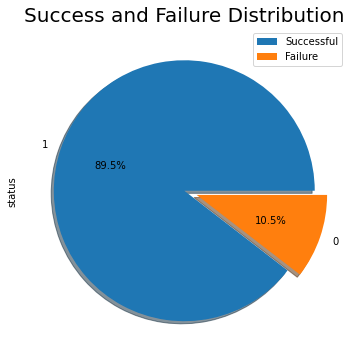

In [6]:
df['status'].value_counts().plot(kind= 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Success and Failure Distribution",fontsize=20)
plt.legend(['Successful','Failure'])
plt.show()

In [7]:
df = df.drop(['name','homepage_url','short_description'],axis=1)

# Creating a Baseline Model

### Train-Test Split

In [8]:
# Declaring X and y
X = df.drop(['status'], axis=1)
y = df['status']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=26)

In [10]:
print('X_train - ',X_train.shape)
print('X_test - ',X_test.shape)
print('y_train - ',y_train.shape)
print('y_test - ',y_test.shape)

X_train -  (74575, 23)
X_test -  (24859, 23)
y_train -  (74575,)
y_test -  (24859,)


In [25]:
#Actual value counts for companies in the test dataset
pd.Series(y_test).value_counts()

1    22300
0     2559
Name: status, dtype: int64

## Baseline Classification Model - Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [18]:
y_pred = logreg.predict(X_test)

Model Evaluation:

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.08      0.14      2559
           1       0.90      0.99      0.94     22300

    accuracy                           0.89     24859
   macro avg       0.67      0.53      0.54     24859
weighted avg       0.86      0.89      0.86     24859



In [20]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred, y_test)))
print('AUC :{0:0.5f}'.format(metrics.roc_auc_score(y_pred, y_test)))
print('Precision :{0:0.5f}'.format(metrics.precision_score(y_pred, y_test)))
print('Recall :{0:0.5f}'.format(metrics.recall_score(y_pred, y_test)))
print('F1 :{0:0.5f}'.format(metrics.f1_score(y_pred, y_test)))

Accuracy :0.89448
AUC :0.66845
Precision :0.98780
Recall :0.90356
F1 :0.94381


We know that the 89% accuracy rating is not accurate - as will be shown below. 

Confusion Matrix:

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  208,  2351],
       [  272, 22028]])

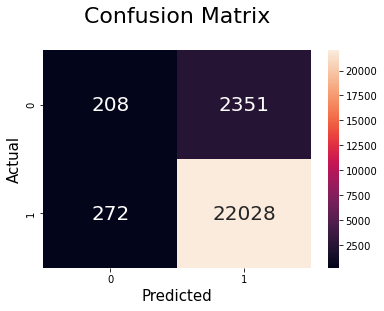

In [22]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={'size': 20}, cmap='rocket', fmt='g')

plt.title('Confusion Matrix', y=1.1, fontsize=22)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show()

* TN = 83
* TP = 22028
* FN = 272
* FP = 2351

The real accuracy of the model is therefore FN/2559 = 10.629%

ROC Curve:

In [27]:
print('AUC :{0:0.5f}'.format(metrics.roc_auc_score(y_pred, y_test)))

AUC :0.66845


In [29]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.04199081, 0.95800919],
       [0.02034422, 0.97965578],
       [0.04468742, 0.95531258],
       ...,
       [0.07078896, 0.92921104],
       [0.05852889, 0.94147111],
       [0.09493552, 0.90506448]])

AUC -  0.5345422206334103 



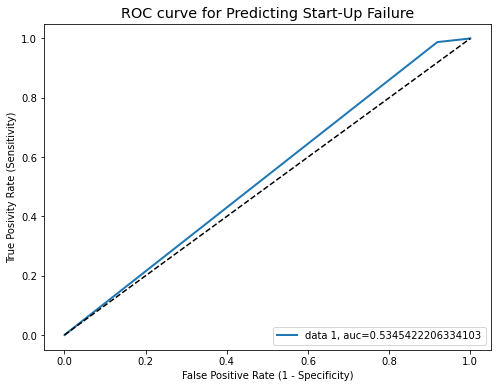

In [31]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC - ', auc, '\n')

plt.plot(fpr,tpr,linewidth=2,label='data 1, auc='+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--')

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting Start-Up Failure')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Posivity Rate (Sensitivity)')
plt.show()

f1=0.944


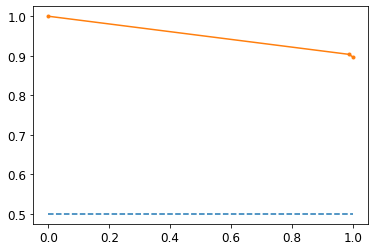

In [32]:
#Calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
#Calculate F1
f1 = metrics.f1_score(y_test, y_pred)
print('f1=%.3f' % (f1))

#Plot no skill
plt.plot([0,1], [0.5,0.5], linestyle='--')
#Plot the ROC curve for the model
plt.plot(recall, precision, marker='.')
plt.show()

# Comparing Class Imbalance Solutions

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

### Undersampling

In [38]:
from collections import Counter 
from sklearn.datasets import make_classification
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

# Undersampling with Logistic Regression
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

Original dataset shape Counter({1: 66732, 0: 7843})
Resampled dataset shape Counter({0: 7843, 1: 7843})


In [39]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))

Accuracy :0.75208
AUC : 0.75233
Precision : 0.96363
Recall : 0.75202
F1 : 0.84477


AUC -  0.7523278431702407 



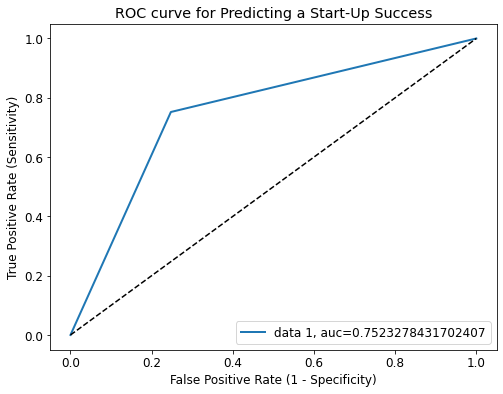

In [40]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Start-Up Success')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

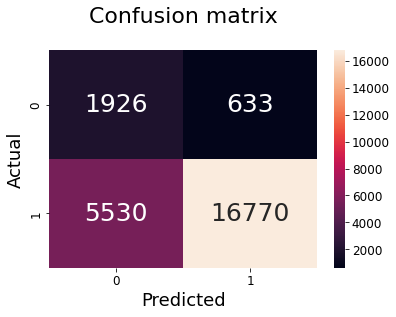

In [41]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="rocket" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

### Oversmapling

In [42]:
from imblearn.over_sampling import RandomOverSampler
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({1: 66732, 0: 7843})
Resampled dataset shape Counter({1: 66732, 0: 66732})


In [43]:
# Oversampling with Logistic Regression
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)

In [44]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))

Accuracy :0.75156
AUC : 0.75273
Precision : 0.96381
Recall : 0.75126
F1 : 0.84436


AUC -  0.7527282325459952 



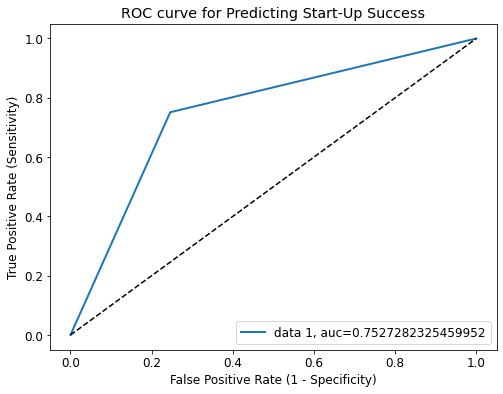

In [45]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting Start-Up Success')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

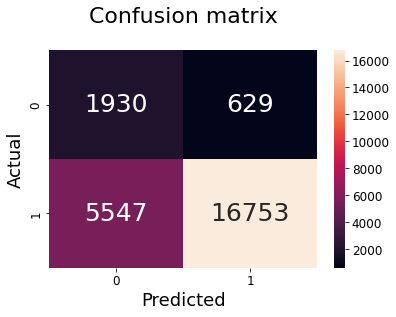

In [46]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="rocket" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)
plt.show()

### SMOTE

In [47]:
from imblearn.over_sampling import SMOTE, ADASYN
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({1: 66732, 0: 7843})
Resampled dataset shape Counter({1: 66732, 0: 66732})


In [48]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [49]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.82240
AUC : 0.70504
Precision : 0.94377
Recall : 0.85283
F1 : 0.89600


AUC -  0.7050370187345464 



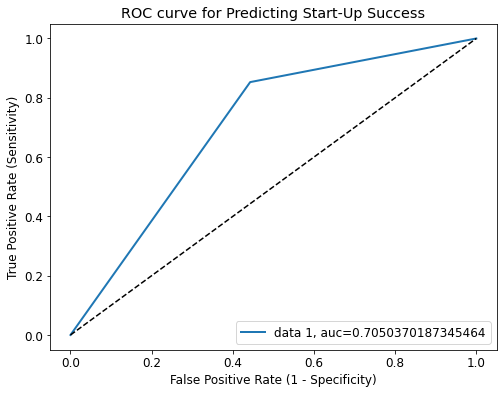

In [50]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting Start-Up Success')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

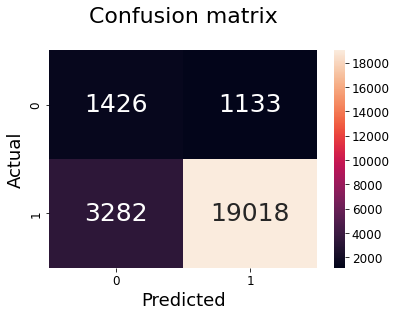

In [51]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="rocket" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)
plt.show()

### ADASYN

In [52]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({1: 66732, 0: 7843})
Resampled dataset shape Counter({1: 66732, 0: 65657})


In [57]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=600)
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)

In [58]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))

Accuracy :0.83547
AUC : 0.69898
Precision : 0.94209
Recall : 0.85713
F1 : 0.89760


AUC -  0.6989831545043694 



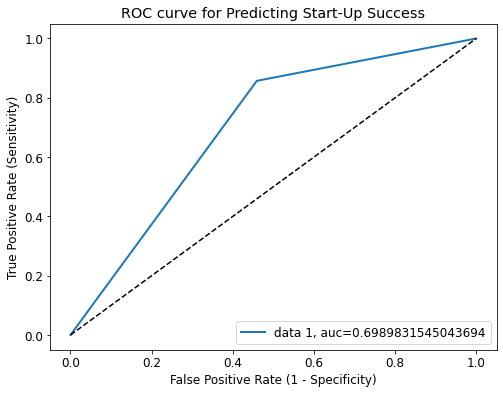

In [59]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting Start-Up Success')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

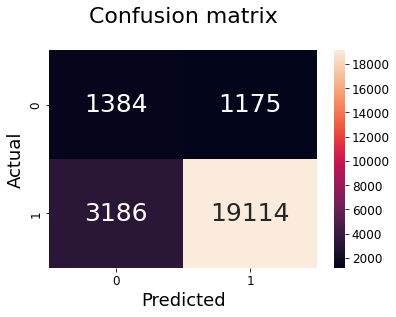

In [60]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="rocket" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)
plt.show()

### Visualising the effects of ADASYN

In [61]:
from sklearn.decomposition import PCA

X_reduced_pca_im = PCA(n_components=2, random_state=42).fit_transform(X_train)

#### Distribution of Imbalanced Set

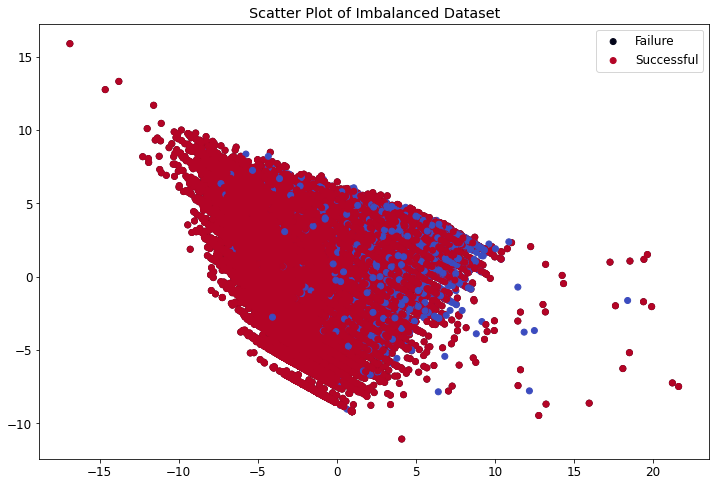

In [62]:
# Generate and plot a synthetic imbalanced classification dataset
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y_train == 0),
            label='Failure', cmap='rocket', linewidths=1)
plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y_train == 1), 
            label='Successful', cmap='coolwarm', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

#Success is red

#### Distribution of Set Balanced with ADASYN

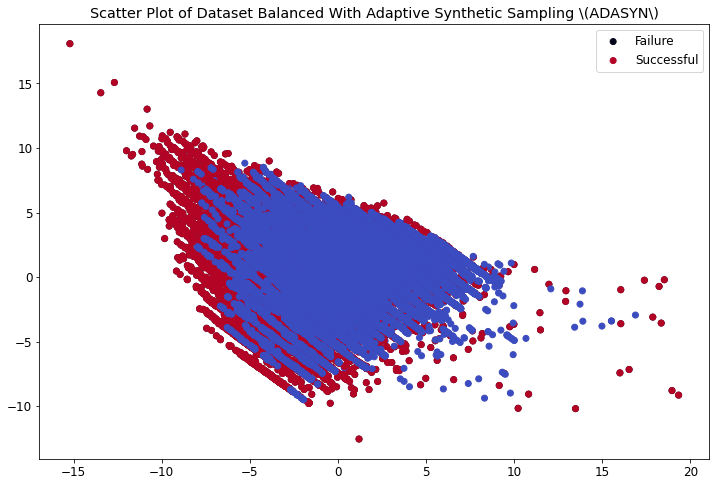

In [63]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_train_adasyn)
# Oversample and plot imbalanced dataset with ADASYN
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train_adasyn == 0), cmap='rocket',
            label='Failure', linewidths=1)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train_adasyn == 1), cmap='coolwarm',
            label='Successful', linewidths=1)

plt.title("Scatter Plot of Dataset Balanced With Adaptive Synthetic Sampling \(ADASYN\)")
plt.legend()
plt.show()

In [64]:
df.to_csv('model.csv')